In [1]:
# Handling maths
import numpy as np
# Handling tabular data
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Tweaks
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
%matplotlib inline
sns.set_style( 'whitegrid')
plt.rcParams[ 'figure.figsize' ] = 8,6

# Model and metrices
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression # To compare

## Loading and Splitting data into independent and dependent variable
Here we have been given a data in which we have to predict the diagnosis 'M'(Malignant) or 'B' (Benign)

In [2]:
data = pd.read_csv("../input/data.csv")
print('Data Shape ',data.shape)
data.head()

Data Shape  (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Check null values in each variables

In [3]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Unnamed: 32 contains all NaN therefore we have to remove this feature
#### Split the features as X(Independent variables) and Y(label or target variable)

In [4]:
y = data.diagnosis
# we have to drop some features as that can't be useful or having empty 
features_drop = ['id','diagnosis','Unnamed: 32']
X = data.drop(features_drop, axis=1)

In [5]:
print("X shpae: ", X.shape)
X.head()

X shpae:  (569, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


B    357
M    212
Name: diagnosis, dtype: int64


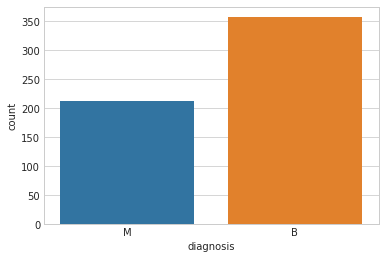

In [6]:
# Target variable count
print(y.value_counts())
sns.countplot(y, label="Count")

In [7]:
# Normalize the data 
data = (X - X.mean())/ (X.std())

## Violin Plots

In [8]:
# function to create violin_plot (to distinguish which feature use)
def plot_violin(startInd, data):
    '''
    Arguments :
    startInd : Starting index
    Return:
    seaborn violin_plot
    '''
#     print(y.shape)
#     print(data.shape)
    temp_data = pd.concat([y, data.iloc[:,startInd:startInd+10]], axis = 1)
    temp_data = pd.melt(temp_data,id_vars="diagnosis",
                        var_name="features",
                        value_name='value')
    plt.figure(figsize=(10,10))
    sns.violinplot(x="value", y="features", hue="diagnosis", data=temp_data,split=True, inner="quart",palette="muted")
    plt.xticks(rotation=90)
    

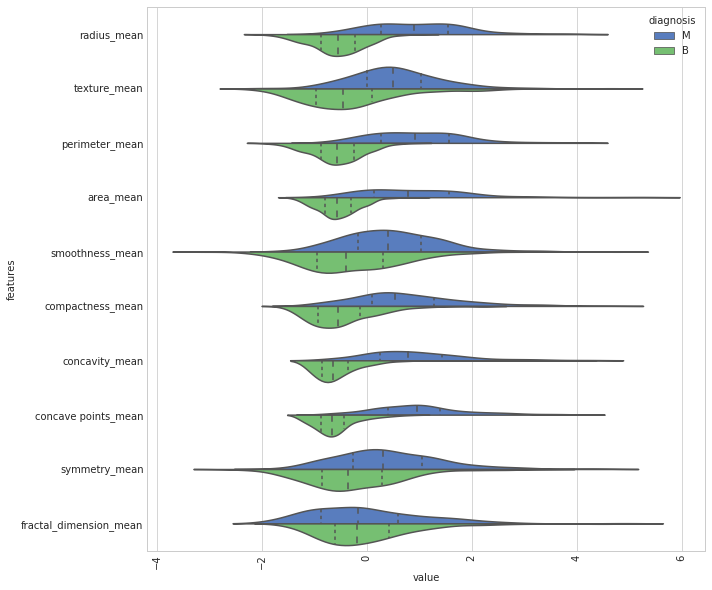

In [9]:
# Violit plot for first 10 features
plot_violin(0, data)

Lets interpret the plot above together. For example, in **texture_mean** feature, median of the Malignant and Benign looks like separated so it can be good for classification. However, in **fractal_dimension_mean** feature, median of the Malignant and Benign does not looks like separated so it does not gives good information for classification.

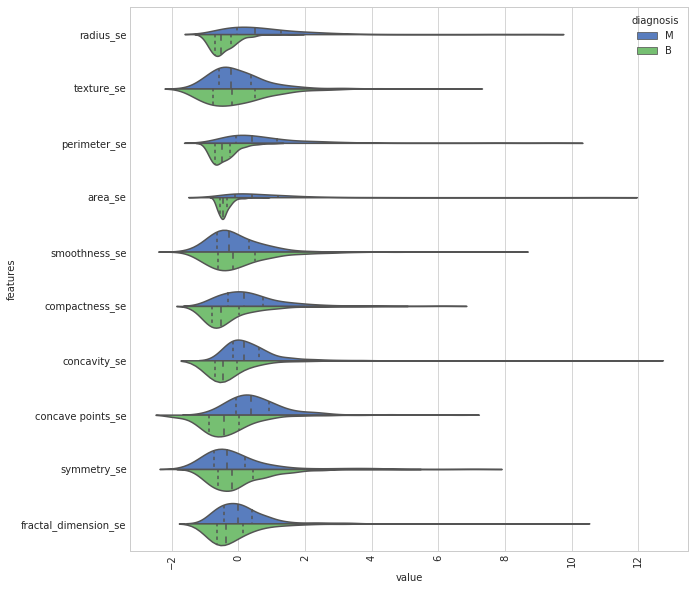

In [10]:
# Violin_plot for next 10 variables
plot_violin(10, data)

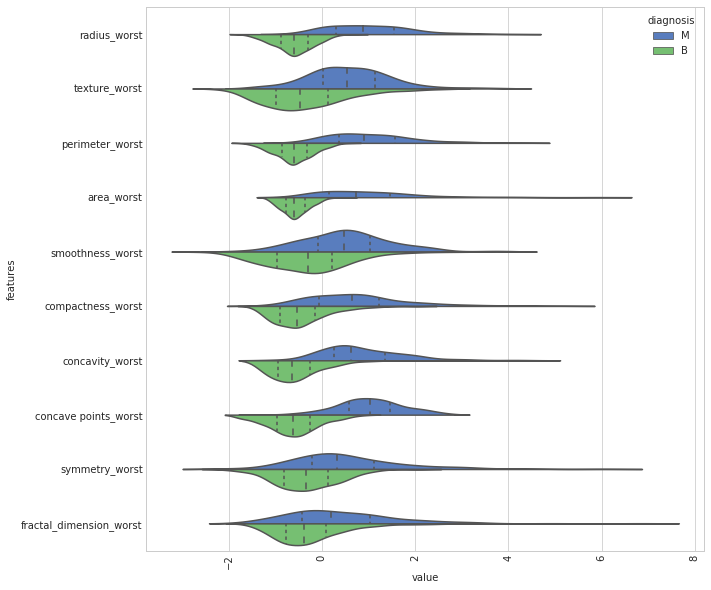

In [11]:
# Violin Plot for last 10 features
plot_violin(20, data)

## Swarm Plots
Swarm plot is useful to distinguish target classes with seperate featues

In [12]:
def plot_swarm(startInd, data):
    temp_data = pd.concat([y, data.iloc[:,startInd:startInd+10]], axis=1)
    temp_data = pd.melt(temp_data,id_vars="diagnosis",
                        var_name="features",
                        value_name='value')
    plt.figure(figsize=(10,10))
    sns.swarmplot(x="value", y="features", hue="diagnosis", data=temp_data, palette="muted")
    plt.xticks(rotation=90)

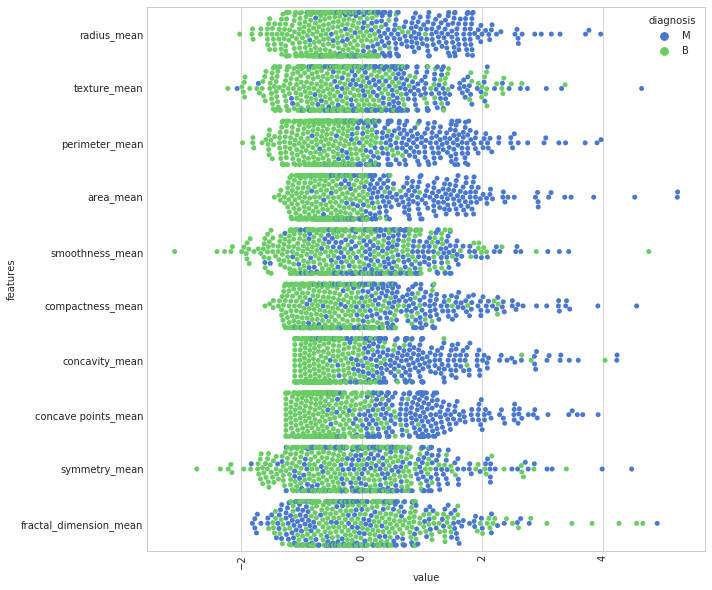

In [13]:
# swarm plot for first 10 features
plot_swarm(0, data)

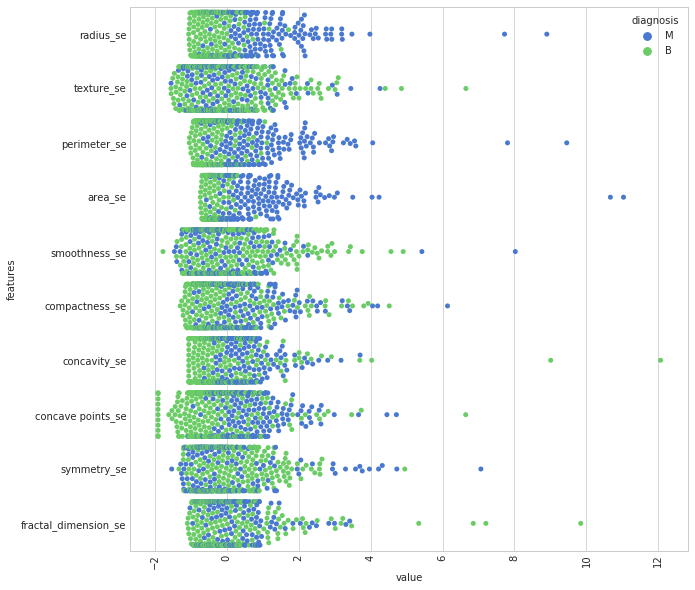

In [14]:
# swarm plot for next 10 features
plot_swarm(10, data)

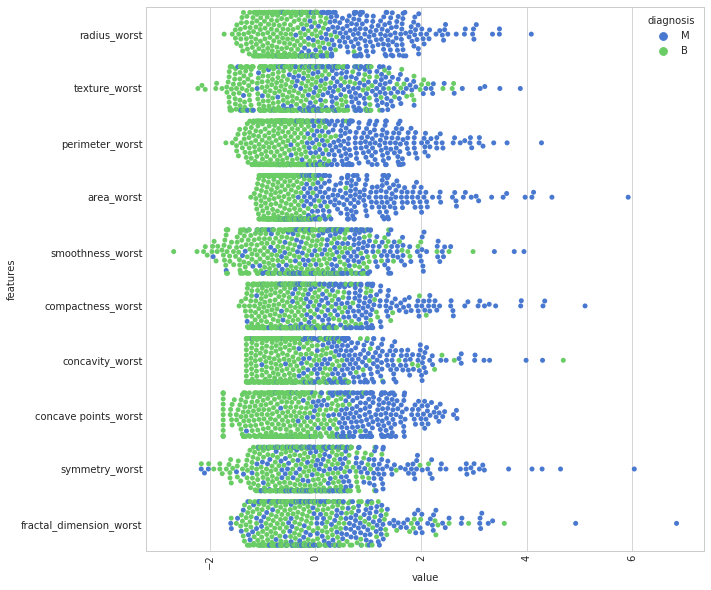

In [15]:
# swarm plot for last 10 features
plot_swarm(20, data)

## Feature selection

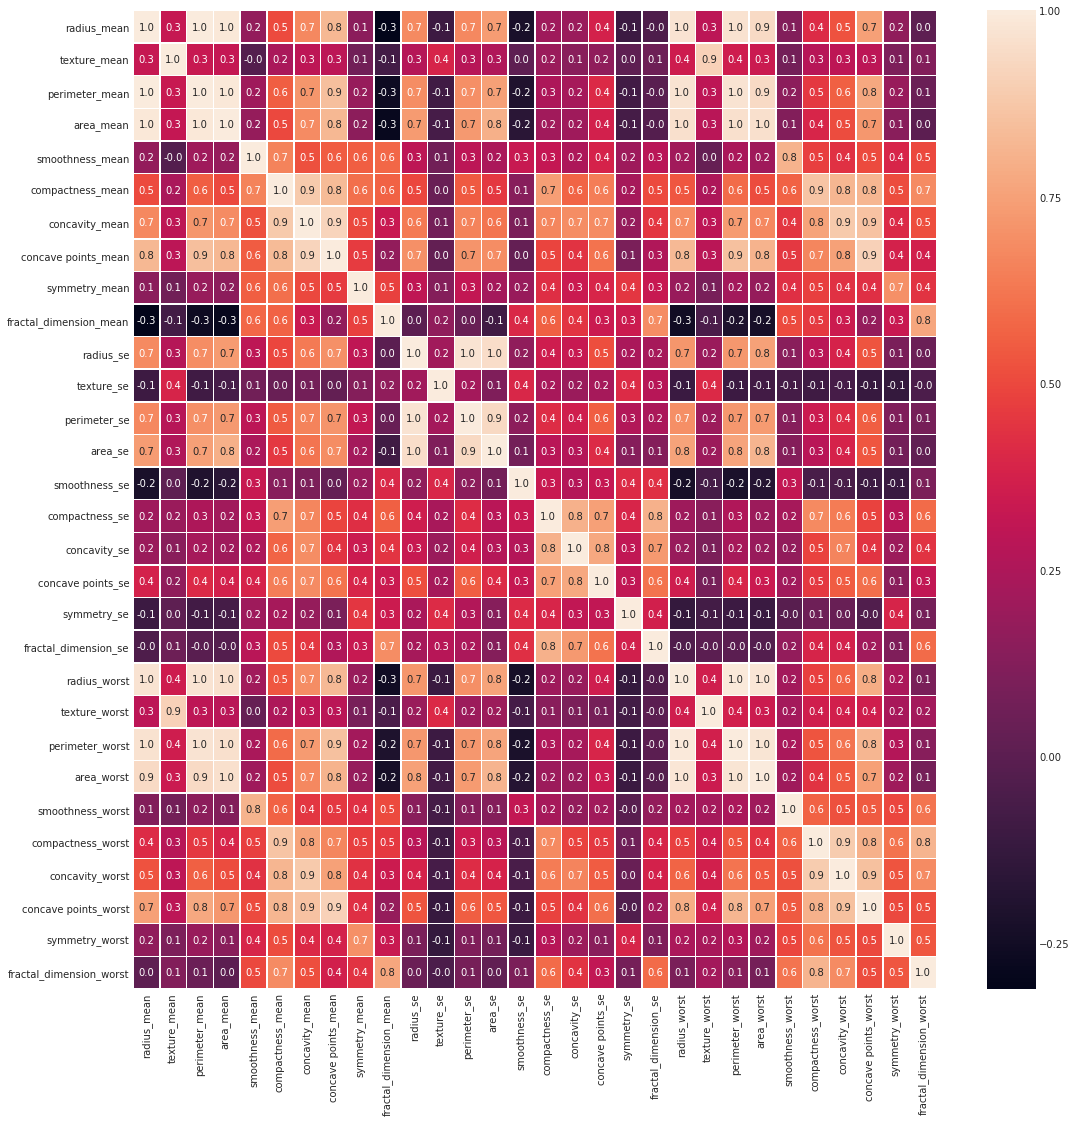

In [16]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [17]:
def normalize(X):
    """
    Normalize the features by subracting with its mean and then divide by standard deviation
    Arguments :
    X : pandas dataframe
    Return
    X: normalize feature as matrix 
    """
    for features in X:
        feats = X[features].tolist()
        mean = np.mean(feats)
        std = np.std(feats)
        feats = (feats - mean)/std
        X[features] = feats
        
    return X.as_matrix()

In [18]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
X_data = X.drop(drop_list,axis = 1 )        # do not modify x, we will use it later 
X_data_norm = normalize(X_data)  # Normalize the data
y_label = y.apply(lambda x: 1 if x == 'M' else 0)  # Label Encoding
y_data = y_label.as_matrix()

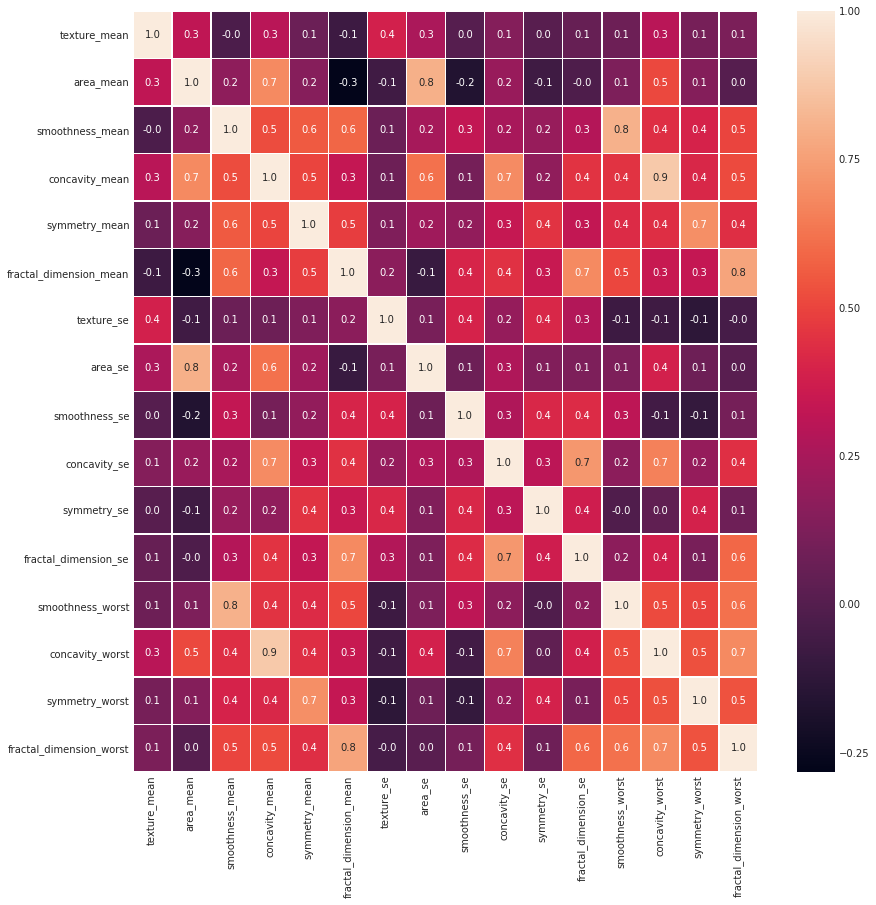

In [19]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Custom Logistic Regression

### utils function

In [20]:
# split data train 80 % and test 20 %
X_train, X_test, y_train, y_test = train_test_split(X_data_norm, y_data, test_size=0.2, random_state=42)

In [21]:
def sigmoid(z):
    """
    Compute the sigmoid of z
    Arguments:
    z -- A scalar or numpy array of any size.
    Return:
    s -- sigmoid(z)
    """
    s = 1 / (1 + np.exp(-1 * z))
    return s

In [22]:
def init_parameters(dim):
    weight = np.zeros((dim,))
    bias = 0
    return weight, bias

In [23]:
def compute_cost(A, y, m):
    return  (- 1 / m) * np.sum(y * np.log(A) + (1 - y) * (np.log(1 - A)))

In [24]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias, a scalar
    X -- data
    
    Returns:
    Y_pred -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[0]
    Y_pred = np.zeros((m,))
    w = w.reshape(X.shape[1],)
    
    A = sigmoid(np.dot(X, w) + b)    
    # iterate through the training samples
    for i in range(m):
        Y_pred[i] = 1  if A[i] > 0.5 else 0
        
    assert(Y_pred.shape == (m,))
    
    return Y_pred

In [25]:
def plot_confustion_matrix(y_test, pred):
    sns.set(font_scale=1.1)
    cm = confusion_matrix(y_test,pred)
    sns.heatmap(cm,annot=True,fmt="d",xticklabels=["Maligent (Actual)", "Benign (Actual)"], yticklabels=["Maligent (Predicted)", "Benign (Predicted)"])
    plt.yticks(rotation=0)

### Logistic regression Function


**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = x  W + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{4}$$

Backpropagation formulas:

$$ \frac{\partial J}{\partial w} = \frac{1}{m}(A-Y)X\tag{5}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{6}$$

In [26]:
def logistic_regression(X, y, learning_rate, iterations):
    # Training Samples     
    m = X.shape[0]
    
    # initialize the parameters
    weight, bias = init_parameters(X.shape[1])
    
    for i in range(iterations):
        # FORWARD PROPAGATION
        A = sigmoid(np.dot(X, weight) + bias)
        cost = compute_cost(A, y, m) # compute_cost
        
        # BACKWARD PROPAGATION
        dw = np.dot((A-y), X) / m
        db = np.sum(A-y) / m

        # Update the parameters
        weight = weight - learning_rate * dw
        bias = bias - learning_rate * db
        
        if i % 100 == 0:
            print("iteration %d cost %f"%(i,cost))
    
    #  Create a python dictionary to store the resultant weight and bias
    parameters = {
        "w":weight,
        "b":bias
    }
    return parameters
  

In [27]:
# Train model
parameters = logistic_regression(X_train, y_train,learning_rate=0.1, iterations=500)

iteration 0 cost 0.693147
iteration 100 cost 0.160327
iteration 200 cost 0.125474
iteration 300 cost 0.110507
iteration 400 cost 0.101765


Training_accuracy 0.9736263736263736
Testing_accuracy 0.9912280701754386


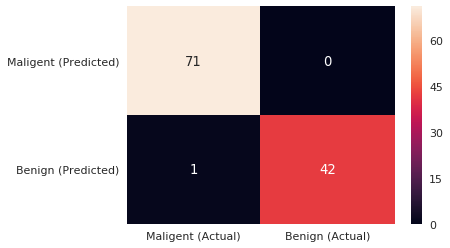

In [28]:
print("Training_accuracy", accuracy_score(y_train,predict(parameters['w'], parameters['b'], X_train)))
print("Testing_accuracy", accuracy_score(y_test,predict(parameters['w'], parameters['b'], X_test)))  
plot_confustion_matrix(y_test, predict(parameters['w'], parameters['b'], X_test))

## Logistic regression using Sklearn

Training_accuracy is : 0.9802197802197802
Testing_accuracy is : 0.9736842105263158


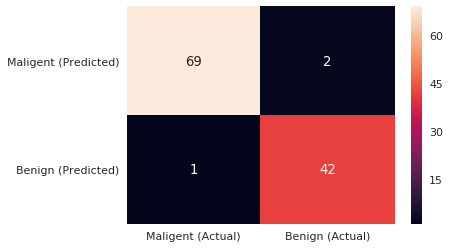

In [29]:
lr = LogisticRegression()      
lr = lr.fit(X_train,y_train)

train_acc = accuracy_score(y_train,lr.predict(X_train))
test_acc = accuracy_score(y_test,lr.predict(X_test))

print('Training_accuracy is :',train_acc)
print('Testing_accuracy is :',test_acc)
plot_confustion_matrix(y_test,lr.predict(X_test))